## Classification of Pnuemnoia on Chest X-Rays

### This is assignment - III where we have to classify X-Ray reports.\

#### We have used the [Kaggle-Xray Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

#### Importing the necesasary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf

In [8]:
import glob

In [9]:
import keras

In [10]:
from PIL import Image

#### Importing the training set

In [11]:
data = glob.glob("D:/Xray Data Classification/chest_xray/train/*/**")

In [12]:
data

['D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0135-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0137-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/train\\NORMAL\\IM-0140-0001.jpeg',
 'D:/Xray Da

In [13]:
len(data)

5216

In [14]:
data[4000].split('\\')[1]

'PNEUMONIA'

In [15]:
data[3011].split('\\')[1]

'PNEUMONIA'

In [16]:
data[4000].split('_')[-2]

# Lenght of virus is 5
# Lenght of bacteria is 8

'virus'

In [17]:
data[210].split('_')

['D:/Xray Data Classification/chest', 'xray/train\\NORMAL\\IM-0410-0001.jpeg']

#### Randomizing the training dataset

In [18]:
from random import shuffle

In [19]:
shuffle(data)

In [20]:
# dataa

#### Visualizing the dataset

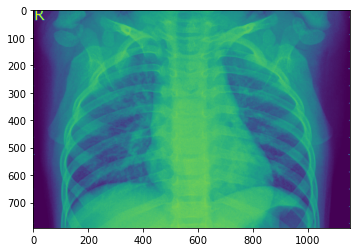

In [21]:
img=Image.open(data[0])
plt.imshow(img)

In [22]:
print("The target to image : " , data[0].split('\\')[1])

The target to image :  PNEUMONIA


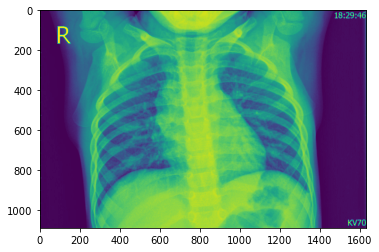

In [23]:
img=Image.open(data[50])
plt.imshow(img)

In [24]:
print("The target to image : " , data[50].split('\\')[1])

The target to image :  PNEUMONIA


#### EDA

In [40]:
y_train = np.zeros(len(data))


In [51]:
for i,file in enumerate(data):
    if len(file.split('\\')[1]) == 6: # The Xray is normal
        y_train[i] = 0
    else: # The Xray is having pneumonia
        if file.split('_')[-2] == 'bacteria':
            y_train[i] = 1
        else:
            y_train[i] = 2
        

In [52]:
y_train

array([2., 1., 0., ..., 2., 0., 2.])

In [28]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical

# y_train = to_categorical(LabelEncoder().fit_transform(y_train))

In [29]:
# y_train

In [30]:
x_train = np.zeros((len(data) , 128 , 128))
x_train[0,  : ,  :].shape

(128, 128)

In [31]:
for i,file in enumerate(data):
    im = Image.open(file)
    im = im.resize((128,128)).convert('L')
    x_train[i ,  : , :] = np.array(im)

In [32]:
x_train = x_train/255

In [33]:
x_train[0]

array([[0.14509804, 0.58431373, 0.01568627, ..., 0.0745098 , 0.04705882,
        0.02745098],
       [0.14509804, 0.57647059, 0.04313725, ..., 0.0745098 , 0.04313725,
        0.02352941],
       [0.11372549, 0.79215686, 0.76078431, ..., 0.07058824, 0.04313725,
        0.02352941],
       ...,
       [0.05098039, 0.        , 0.        , ..., 0.        , 0.        ,
        0.05098039],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Model Building

In [34]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, MaxPool2D

In [53]:
model = keras.Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape
=(128, 128, 1)))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

In [54]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)      

#### Model Training

In [79]:
model.fit(x_train, y_train , epochs =  10 , validation_split = 0.1)

Epoch 1/10
147/147 [==============================] - 45s 305ms/step - loss: 0.5080 - accuracy: 0.7725 - val_loss: 0.5681 - val_accuracy: 0.7107
Epoch 2/10
147/147 [==============================] - 42s 284ms/step - loss: 0.4843 - accuracy: 0.7801 - val_loss: 0.4962 - val_accuracy: 0.7720
Epoch 3/10
147/147 [==============================] - 41s 279ms/step - loss: 0.4784 - accuracy: 0.7804 - val_loss: 1.3684 - val_accuracy: 0.6303
Epoch 4/10
147/147 [==============================] - 42s 283ms/step - loss: 0.4798 - accuracy: 0.7867 - val_loss: 0.4620 - val_accuracy: 0.7874
Epoch 5/10
147/147 [==============================] - 45s 306ms/step - loss: 0.4600 - accuracy: 0.7912 - val_loss: 0.5616 - val_accuracy: 0.7893
Epoch 6/10
147/147 [==============================] - 41s 278ms/step - loss: 0.4535 - accuracy: 0.7953 - val_loss: 0.4834 - val_accuracy: 0.7797
Epoch 7/10
147/147 [==============================] - 42s 286ms/step - loss: 0.4564 - accuracy: 0.7980 - val_loss: 0.4778 - val_ac

#### Loading Test Data Now!

In [65]:
test_data = glob.glob("D:/Xray Data Classification/chest_xray/test/*/**")

In [66]:
test_data

['D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0001-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0003-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0005-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0006-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0007-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0009-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0010-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0011-0001-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0011-0001-0002.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0011-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0013-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0015-0001.jpeg',
 'D:/Xray Data Classification/chest_xray/test\\NORMAL\\IM-0016-0001.jpeg',
 'D:/Xray Data 

#### Encoding and Data Transformation

In [125]:
y_test = np.zeros(len(test_data))

In [127]:
for i,file in enumerate(test_data):
    if len(file.split('\\')[1]) == 6: # The Xray is normal
        y_test[i] = 0
    else: # The Xray is having pneumonia4
        if file.split('_')[-2] == 'bacteria':
            y_test[i] = 1
        else:
            y_test[i] = 2
        

In [70]:
x_test = np.zeros((len(test_data) , 128 , 128))
x_test[0,  : ,  :].shape

(128, 128)

In [71]:
for i,file in enumerate(test_data):
    im = Image.open(file)
    im = im.resize((128,128)).convert('L')
    x_test[i ,  : , :] = np.array(im)

In [72]:
x_test = x_test/255

In [73]:
x_test[0]

array([[0.12156863, 0.1254902 , 0.12156863, ..., 0.12156863, 0.1254902 ,
        0.12156863],
       [0.12156863, 0.1254902 , 0.12156863, ..., 0.11764706, 0.12156863,
        0.11764706],
       [0.12156863, 0.1254902 , 0.12156863, ..., 0.1254902 , 0.1254902 ,
        0.11764706],
       ...,
       [0.10980392, 0.11372549, 0.10980392, ..., 0.13333333, 0.13333333,
        0.12941176],
       [0.10980392, 0.11372549, 0.10980392, ..., 0.12941176, 0.12941176,
        0.1254902 ],
       [0.10980392, 0.11372549, 0.10980392, ..., 0.12941176, 0.12941176,
        0.1254902 ]])

#### Prediction using the Model

In [128]:
y_predict = model.predict(x_test)

20/20 [==============================] - 1s 62ms/step


In [129]:
y_predict

array([[7.7998948e-01, 1.5800829e-01, 6.2002223e-02],
       [1.7530815e-01, 3.5801333e-01, 4.6667853e-01],
       [4.6021985e-03, 6.5739256e-01, 3.3800521e-01],
       ...,
       [5.0999072e-10, 8.6683100e-01, 1.3316898e-01],
       [1.5064174e-03, 5.6375915e-01, 4.3473443e-01],
       [1.7644532e-05, 9.5716596e-01, 4.2816397e-02]], dtype=float32)

In [130]:
y_labels_test = np.zeros((len(test_data)))

#### Decoding the predicted data

In [131]:
for i in range(len(test_data)):
    y_labels_test[i] = np.argmax(y_predict[i])

In [132]:
y_labels_test

array([0., 2., 1., 2., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 2., 0., 1., 2., 1., 1., 2., 1.,
       2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 2., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 2., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 2., 2.,
       2., 2., 1., 2., 1., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 0., 0., 0., 0., 0.,
       2., 0., 0., 2., 1., 1., 1., 1., 0., 0., 0., 0., 1., 2., 1., 1., 1.,
       0., 1., 2., 2., 2., 0., 0., 0., 0., 0., 2., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 2., 1., 1., 2., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 2., 0., 0., 1., 0., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.

#### Calculations related to accuracy of true vs predicted labels

In [134]:
equalCount = 0

for i in range(len(test_data)):
    if y_labels_test[i] == y_test[i]:
        equalCount += 1

In [135]:
equalCount

448

In [136]:
print("There are ", equalCount, " data predictions that are correct according to given Label out of "  ,len(test_data) , " data present" )

There are  448  data predictions that are correct according to given Label out of  624  data present


In [137]:
accuracyScore = equalCount/len(test_data)

In [138]:
print("The accuracy score for testing the data is : ", accuracyScore)

The accuracy score for testing the data is :  0.717948717948718
